#Algoritmo da Mochila fracionária

Dados os pesos e lucros de N itens, na forma de {lucro, peso} coloque esses itens em uma mochila de capacidade W para obter o lucro total máximo na mochila. Na Mochila Fracionária , podemos quebrar itens para maximizar o valor total da mochila.

- Exemplo

    Entrada:  arr[ ] = {{60, 10}, {100, 20}, {120, 30}}, W = 50 Saída: 240

    Explicação  :
    Pegando itens com peso de 10 e 20 kg e 2/3 fração de 30 kg. Portanto, o preço total será 60+100+(2/3)(120) = 240

    Entrada:   arr[ ] = {{500, 30}}, W = 10
    Saída: 166,667

## Problema da mochila fracionária usando o algoritmo Greedy
A ideia básica da abordagem gananciosa é calcular a relação lucro/peso para cada item e classificar o item com base nessa relação. Em seguida, pegue o item com a proporção mais alta e adicione o máximo que pudermos (pode ser o elemento inteiro ou uma fração dele).

Isto sempre dará o lucro máximo porque, em cada etapa adiciona um elemento tal que este seja o lucro máximo possível para tanto peso.

Ilustração:
Verifique a ilustração abaixo para um melhor entendimento:
Considere o exemplo: arr[ ] = {{100, 20}, {60, 10}, {120, 30}}, W = 50.
Classificação: classifique inicialmente a matriz com base na relação lucro/peso. A matriz classificada será {{60, 10}, {100, 20}, {120, 30}}.

Iteração:
- Para i = 0 , peso = 10 que é menor que W. Então adicione este elemento na mochila. lucro = 60 e W restante = 50 – 10 = 40.
- Para i = 1 , peso = 20 que é menor que W. Portanto, adicione este elemento também. lucro = 60 + 100 = 160 e W restante = 40 – 20 = 20.
- Para i = 2 , peso = 30 é maior que W. Portanto, adicione a fração 20/30 = 2/3 da fração do elemento. Portanto lucro = 2/3 * 120 + 160 = 80 + 160 = 240 e o W restante torna-se 0.

Portanto, o lucro final passa a ser 240 para W = 50.


Teoria do algoritmo de Greedy
*Greedy é um paradigma algorítmico que constrói uma solução peça por peça, sempre escolhendo a próxima peça que ofereça o benefício mais óbvio e imediato. Portanto, os problemas em que a escolha do ótimo local também leva à solução global são os mais adequados para Greedy.*

Por exemplo, considere o problema da mochila fracionária . A estratégia ótima local é escolher o item que possui relação valor máximo versus peso. Esta estratégia também leva a uma solução globalmente ótima porque podemos pegar frações de um item.

##Carregando arquivos necessários

In [1]:
!git clone https://github.com/RanieryAV/Topicos-II-Primeiro-Trabalho.git

Cloning into 'Topicos-II-Primeiro-Trabalho'...
remote: Enumerating objects: 181, done.
remote: Counting objects: 100% (29/29), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 181 (delta 15), reused 21 (delta 13), pack-reused 152
Receiving objects: 100% (181/181), 542.40 KiB | 8.34 MiB/s, done.
Resolving deltas: 100% (79/79), done.


##Importações

In [2]:
import timeit
from time import time_ns
import psutil
import os

import numpy as np
import matplotlib.pyplot as plt

##Métricas de avaliação

In [3]:
def process_memory():
  process = psutil.Process(os.getpid())
  mem_info = process.memory_info()
  return mem_info.rss

def getMemory(funcao, W, arr):
  start_time = time_ns()  #Pega o tempo inicial
  mem_before = process_memory() #Pega a memória inicial
  #XXXXXXXXXXXXXXXXXXXXXXXXXXXX

  results = funcao(W, arr)

  #XXXXXXXXXXXXXXXXXXXXXXXXXXXX
  mem_after = process_memory() #Pega a memória final
  mem_used = mem_after - mem_before  #Calcula a memória consumida em bytes
  end_time = time_ns()  # Pega o tempo de término
  elapsed_time = end_time - start_time  #Calcula o tempo consumido em nanossegundos

  return mem_used, elapsed_time, results

##Gerar instâncias

In [4]:

import random

tamanho = 100

for i in range(1,7):
    file = open('/content/Topicos-II-Primeiro-Trabalho/Mochila-Fracionaria/Instancias/{}.txt'.format(i),'w')
    W = random.randint(1,100)
    file.writelines(str(W) + " \n")
    for j in range(tamanho):
        lucro = random.randint(1, 100)
        peso = random.randint(1, 100)
        item = [str(lucro), ', ', str(peso)]
        file.writelines(item)
    print("Instância: {}".format(i))
    tamanho *= 10
    file.close()

Instância: 1
Instância: 2
Instância: 3
Instância: 4
Instância: 5


KeyboardInterrupt: ignored

##Leitura de instâncias

In [5]:
def listFiles(caminho):
    '''
        Função para ler e listar arquivos de uma pasta
        :param caminho: recebe o endereço do diretório
        :param return: lista com endereço e nome dos arquivos
    '''
    nomes = []
    for diretorio, subpastas, arquivos in os.walk(caminho):
        for arquivo in arquivos:
            nomes.append(os.path.join(diretorio, arquivo))
    return nomes

def carregaArquivo(arquivo):
    '''
        Função para ler arquivos txt
        :param arquivos: lista com endereço e nome dos arquivos
        :param return: lista com os valores lidos nos arquivos no formato inteiro
    '''
    valores = []

    instancia = open(arquivo, 'r')
    instancia = instancia.readlines()
    list(instancia)

    result = [item.split(',') for item in instancia]
    result = [value for value in result if value != " \n"]
    result_flat = []

    for l in result:
        for item in l:
            item  = ''.join(item.splitlines())
            item = item.replace(" ", "")
            result_flat.append(int(item))

    valores.append(result_flat)

    return valores

##Algoritmo Greedy para Mochila Fracionária

In [6]:
class Item:
  def __init__(self, profit, weight):
    self.profit = profit
    self.weight = weight

def fractionalKnapsack(W, arr):
  arr.sort(key=lambda x: (x.profit/x.weight), reverse=True)
  finalvalue = 0.0

  for item in arr:
    if item.weight <= W:
      W -= item.weight
      finalvalue += item.profit
    else:
      finalvalue += item.profit * W / item.weight
      break

  return finalvalue

def analise(W, arr):
  result = []
  #Organizando valores
  for i in range(0, int(len(arr)/2)):
    result.append(Item(arr[i], arr[i+1]))

  #Requisitos do trabalho
  memoria = []
  dados = []
  mediaTempo = 0
  grafTempo = []
  cont = 1
  tempo = 0

  while(tempo <= 5):
    mem_used, elapsed_time, results = getMemory(fractionalKnapsack, W, result)

    elapsed_time = elapsed_time / 1e9
    tempo = tempo + elapsed_time
    grafTempo.append(elapsed_time)

    cont = cont + 1

    memoria.append(mem_used)
    dados.append(results)

  mediaTempo = tempo / cont

  print("Lista com valores de memória: {}".format(memoria))
  # print("Lista com resultados obtidos: {}".format(dados))
  # print("Média de tempo: {}".format(mediaTempo))
  # print("Lista com valores de tempo: {}".format(grafTempo))
  print("Número de interações necessárias para atingir 5s: {}".format(cont - 1))

  return memoria, mediaTempo, cont, grafTempo

##Análise resultados

Lendo arquivo: /content/Topicos-II-Primeiro-Trabalho/Mochila-Fracionaria/Instancias/1.txt
Lista com valores de memória: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

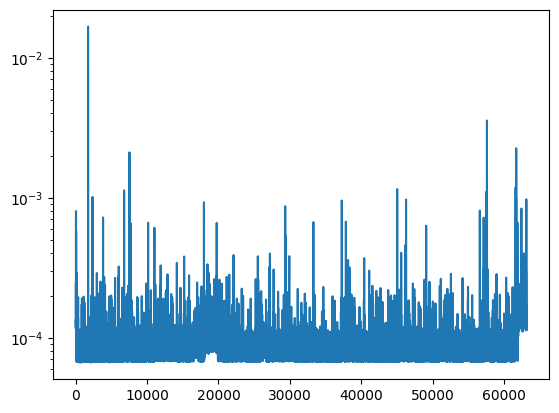

Lendo arquivo: /content/Topicos-II-Primeiro-Trabalho/Mochila-Fracionaria/Instancias/2.txt
Lista com valores de memória: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

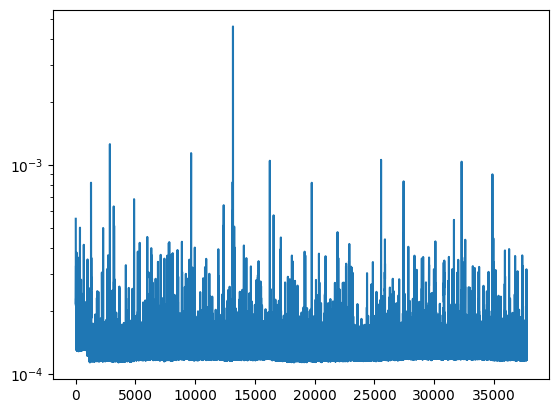

Lendo arquivo: /content/Topicos-II-Primeiro-Trabalho/Mochila-Fracionaria/Instancias/5.txt
Lista com valores de memória: [15949824, -9207808, 0, 1032192, 1032192, 0, 1032192, 1007616, -4096, 1032192, 1032192, 1032192, 1032192, 806912, 270336, 0, 0, 0, 0, 0, 0]
Número de interações necessárias para atingir 5s: 21


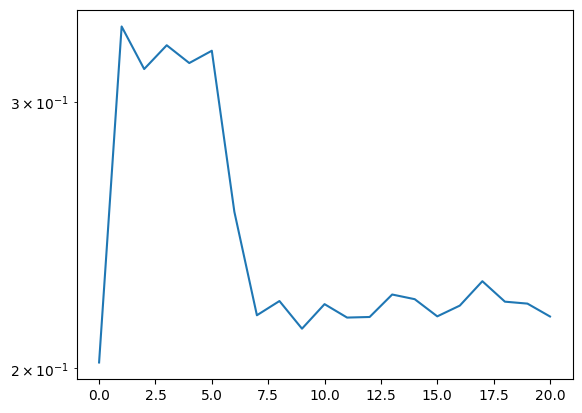

Lendo arquivo: /content/Topicos-II-Primeiro-Trabalho/Mochila-Fracionaria/Instancias/3.txt
Lista com valores de memória: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -65671168, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

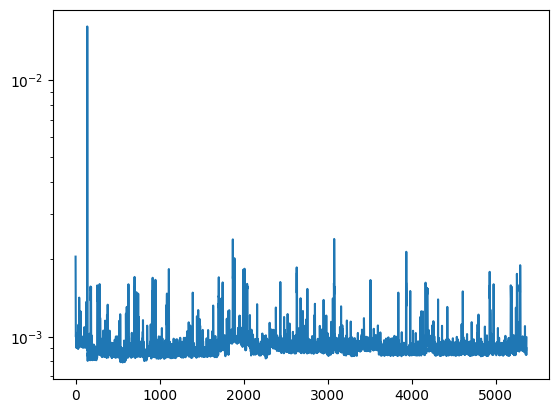

Lendo arquivo: /content/Topicos-II-Primeiro-Trabalho/Mochila-Fracionaria/Instancias/6.txt
Lista com valores de memória: [52867072, -28033024, 2060288, 942080, -1036288, 1183744, 2048000, 3096576, 2080768]
Número de interações necessárias para atingir 5s: 9


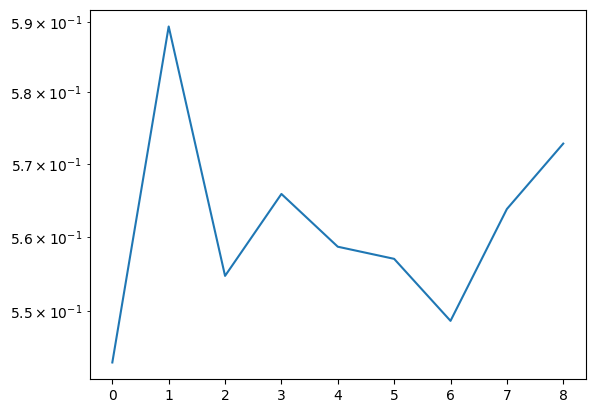

Lendo arquivo: /content/Topicos-II-Primeiro-Trabalho/Mochila-Fracionaria/Instancias/4.txt
Lista com valores de memória: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

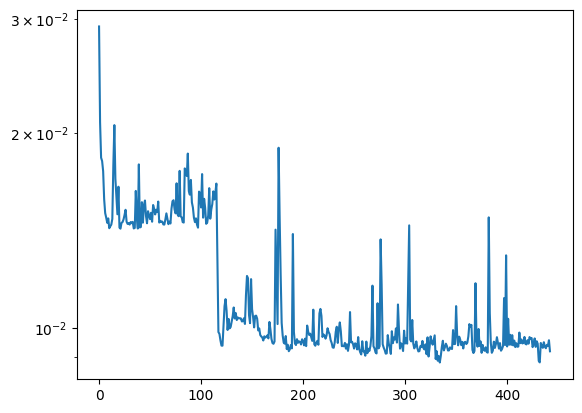

In [8]:
#Tempo de processamento

caminho = "/content/Topicos-II-Primeiro-Trabalho/Mochila-Fracionaria/Instancias/"
arquivos = listFiles(caminho)

for arq in arquivos:
  print("Lendo arquivo: {}".format(arq))
  vet = carregaArquivo(arq)
  W = vet[0][0]
  arr = vet[0][1:]

  memoria, mediaTempo, cont, grafTempo = analise(W, arr)

  #Tempo
  plt.yscale('log')
  plt.plot(grafTempo)
  plt.show()

  #Memória
  # plt.yscale('log')
  # plt.plot(cont, memoria)
  # plt.show()

##Referências
- https://www.geeksforgeeks.org/fractional-knapsack-problem/
- https://www.geeksforgeeks.org/greedy-algorithms/
- https://www.youtube.com/watch?v=ijtXIsfZ960
- https://www.youtube.com/watch?v=wuLAH-7qYDY
- https://www.youtube.com/watch?v=CRYjHV_29gU